#### Initial Development

First run models on basic Train-Test Split

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df = pd.read_csv('clean_data.csv')

X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate Performance
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lr, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"R-squared: {r2_score(y_test, y_pred_lr)}")

MSE: 138194061946.39297
RMSE: 371744.61925681314
MAE: 251502.86452095807
R-squared: 0.6501071412030586


KNN Regression

In [4]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate Performance
print(f"MSE: {mean_squared_error(y_test, y_pred_knn)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_knn, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_knn)}")
print(f"R-squared: {r2_score(y_test, y_pred_knn)}")

MSE: 129542766532.88054
RMSE: 359920.5002953854
MAE: 228576.79461077845
R-squared: 0.6720113130748206


Decision Tree Regression

In [5]:
from sklearn.tree import DecisionTreeRegressor

dtree_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dtree_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dtree = dtree_model.predict(X_test)

# Evaluate Performance
print(f"MSE: {mean_squared_error(y_test, y_pred_dtree)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_dtree, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dtree)}")
print(f"R-squared: {r2_score(y_test, y_pred_dtree)}")

MSE: 136339090239.02507
RMSE: 369241.23583238246
MAE: 225592.9098053892
R-squared: 0.6548037348521415


XGBoost

In [6]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Performance
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_xgb, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"R-squared: {r2_score(y_test, y_pred_xgb)}")

MSE: 64681457988.97476
RMSE: 254325.4961441632
MAE: 160174.89092323167
R-squared: 0.8362333379006134


See how the 5 models compare

In [149]:
r2_dict =  {'lr':0.6501071412030586, 'knn': 0.6720113130748206,'dt': 0.6548037348521415, "xg": 0.8362333379006134}
r2_dict = dict(sorted(r2_dict.items(), key=lambda item: item[1], reverse=True))
r2_dict

{'xg': 0.8362333379006134,
 'knn': 0.6720113130748206,
 'dt': 0.6548037348521415,
 'lr': 0.6501071412030586}

In [150]:
mae_dict =  {'lr':251502.86452095807, 'knn': 228576.79461077845,'dt': 225592.9098053892, "xg": 160174.89092323167}
mae_dict = dict(sorted(mae_dict.items(), key=lambda item: item[1], reverse=False))
mae_dict

{'xg': 160174.89092323167,
 'dt': 225592.9098053892,
 'knn': 228576.79461077845,
 'lr': 251502.86452095807}

In [151]:
rmse_dict =  {'lr': 371744.61925681314, 'knn': 359920.5002953854,'dt': 369241.23583238246, "xg": 254325.4961441632}
rmse_dict = dict(sorted(rmse_dict.items(), key=lambda item: item[1], reverse=False))
rmse_dict

{'xg': 254325.4961441632,
 'knn': 359920.5002953854,
 'dt': 369241.23583238246,
 'lr': 371744.61925681314}

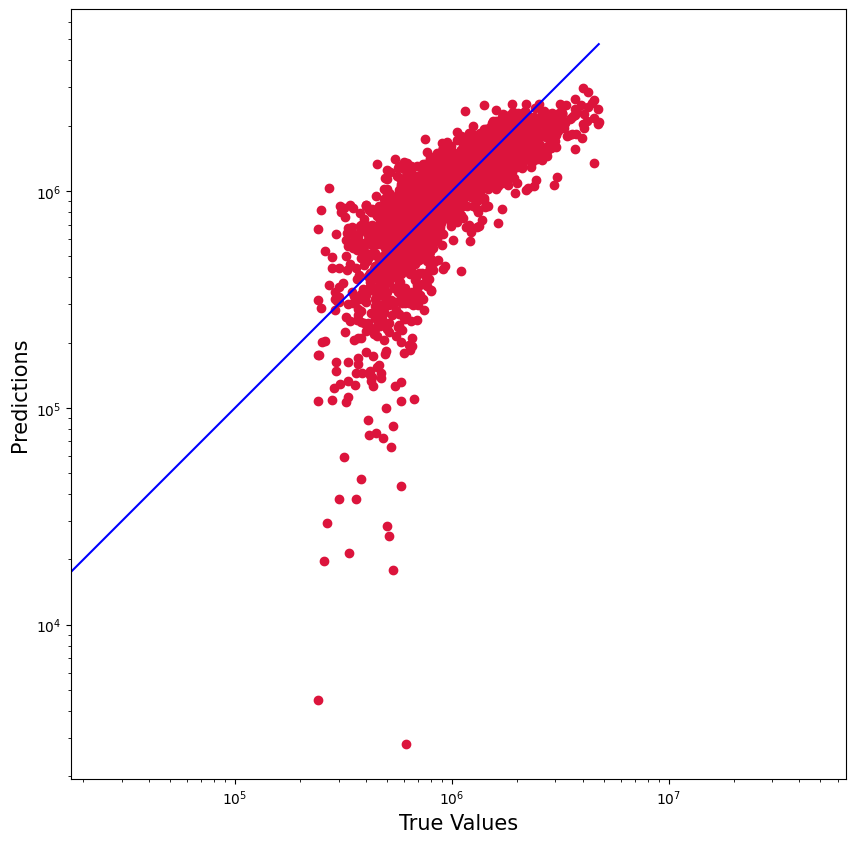

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_lr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_lr), max(y_test))
p2 = min(min(y_pred_lr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

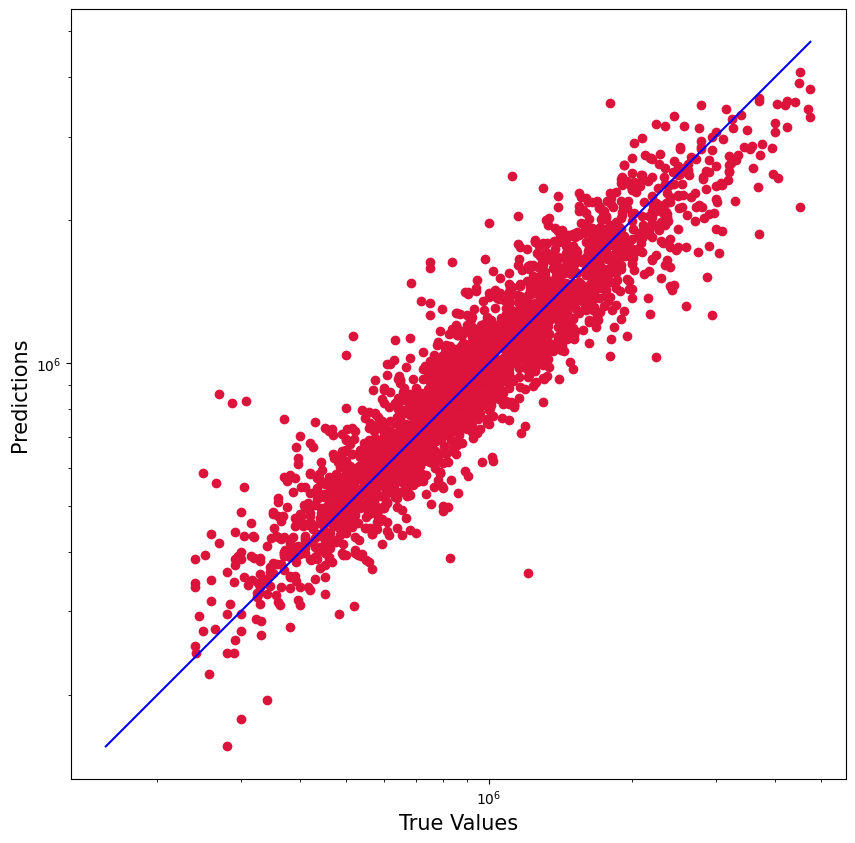

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_xgb, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_xgb), max(y_test))
p2 = min(min(y_pred_xgb), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

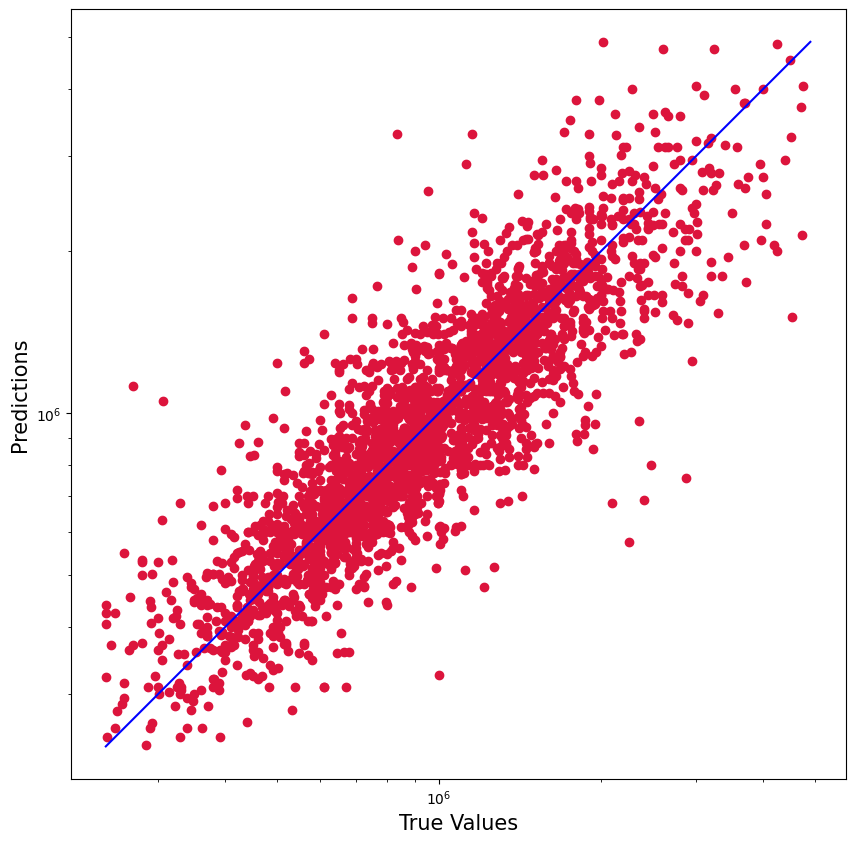

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_dtree, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_dtree), max(y_test))
p2 = min(min(y_pred_dtree), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### Overfitting vs Underfitting

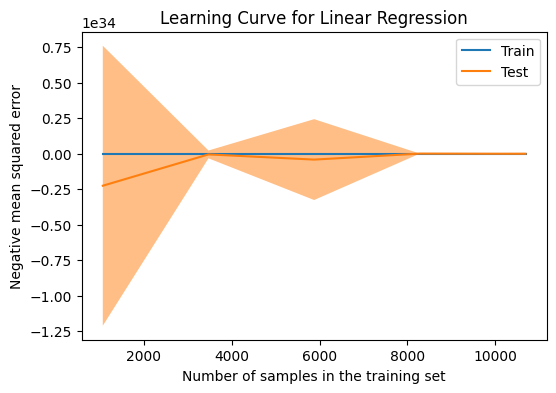

In [212]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit, LearningCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, y_train, X_test, y_test are already defined

# Combine train and test sets for learning curve (it will split internally)
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

# Initialize your Linear Regression model
lr_model = LinearRegression()

# Set up parameters for the learning curve
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
train_sizes = np.linspace(0.1, 1.0, 5)

# Plotting the learning curve
fig, ax = plt.subplots(figsize=(6, 4))
LearningCurveDisplay.from_estimator(
    lr_model,
    X, y,
    cv=cv,
    train_sizes=train_sizes,
    scoring='neg_mean_squared_error',  # Change this if you prefer a different metric
    n_jobs=4,
    ax=ax,
    error_score="raise"
)

ax.set_title('Learning Curve for Linear Regression')
plt.show()


In [214]:
len(y_train)

10687